## Library Import

In [247]:
# standard library
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math

# library for feature selection
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2
from scipy.stats import ttest_ind

# library for data pre processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTEENN

# library for model algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

# library for model evaluation
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report,  confusion_matrix, plot_roc_curve
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

# Removing warnings
import warnings
warnings.filterwarnings('ignore')

In [114]:
## Loading Dataset

In [19]:
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

In [20]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173753 entries, 3 to 253678
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       173753 non-null  float64
 1   HighBP                173753 non-null  float64
 2   HighChol              173753 non-null  float64
 3   CholCheck             173753 non-null  float64
 4   BMI                   173753 non-null  float64
 5   Smoker                173753 non-null  float64
 6   Stroke                173753 non-null  float64
 7   HeartDiseaseorAttack  173753 non-null  float64
 8   PhysActivity          173753 non-null  float64
 9   Fruits                173753 non-null  float64
 10  Veggies               173753 non-null  float64
 11  HvyAlcoholConsump     173753 non-null  float64
 12  AnyHealthcare         173753 non-null  float64
 13  NoDocbcCost           173753 non-null  float64
 14  GenHlth               173753 non-null  float64
 15  

In [8]:
for column in df.columns:
    print(column)
    print(df[column].unique())

Diabetes_binary
[0. 1.]
HighBP
[1. 0.]
HighChol
[1. 0.]
CholCheck
[1. 0.]
BMI
[40. 25. 28. 27. 24. 30. 34. 26. 33. 21. 23. 22. 38. 32. 37. 31. 29. 20.
 35. 45. 39. 19. 47. 18. 36. 43. 55. 49. 42. 17. 16. 41. 44. 50. 59. 48.
 52. 46. 54. 57. 53. 14. 15. 51. 58. 63. 61. 56. 74. 62. 64. 66. 73. 85.
 60. 67. 65. 70. 82. 79. 92. 68. 72. 88. 96. 13. 81. 71. 75. 12. 77. 69.
 76. 87. 89. 84. 95. 98. 91. 86. 83. 80. 90. 78.]
Smoker
[1. 0.]
Stroke
[0. 1.]
HeartDiseaseorAttack
[0. 1.]
PhysActivity
[0. 1.]
Fruits
[0. 1.]
Veggies
[1. 0.]
HvyAlcoholConsump
[0. 1.]
AnyHealthcare
[1. 0.]
NoDocbcCost
[0. 1.]
GenHlth
[5. 3. 2. 4. 1.]
MentHlth
[18.  0. 30.  3.  5. 15. 10.  6. 20.  2. 25.  1.  4.  7.  8. 21. 14. 26.
 29. 16. 28. 11. 12. 24. 17. 13. 27. 19. 22.  9. 23.]
PhysHlth
[15.  0. 30.  2. 14. 28.  7. 20.  3. 10.  1.  5. 17.  4. 19.  6. 12. 25.
 27. 21. 22.  8. 29. 24.  9. 16. 18. 23. 13. 26. 11.]
DiffWalk
[1. 0.]
Sex
[0. 1.]
Age
[ 9.  7. 11. 10.  8. 13.  4.  6.  2. 12.  5.  1.  3.]
Education
[4. 6. 

In [6]:
## Cleaning Dataset

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [8]:
### check missing value

In [9]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
### check data duplicates

In [22]:
duplicates = df[df.duplicated()]
print(duplicates.count())

Diabetes_binary         24206
HighBP                  24206
HighChol                24206
CholCheck               24206
BMI                     24206
Smoker                  24206
Stroke                  24206
HeartDiseaseorAttack    24206
PhysActivity            24206
Fruits                  24206
Veggies                 24206
HvyAlcoholConsump       24206
AnyHealthcare           24206
NoDocbcCost             24206
GenHlth                 24206
MentHlth                24206
PhysHlth                24206
DiffWalk                24206
Sex                     24206
Age                     24206
Education               24206
Income                  24206
dtype: int64


In [18]:
df = df.drop_duplicates().reset_index(drop=True)

In [10]:
## Data after Cleaning

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,229474.0,0.152945,0.359936,0.0,0.0,0.0,0.0,1.0
HighBP,229474.0,0.454343,0.497912,0.0,0.0,0.0,1.0,1.0
HighChol,229474.0,0.441640,0.496584,0.0,0.0,0.0,1.0,1.0
CholCheck,229474.0,0.959481,0.197173,0.0,1.0,1.0,1.0,1.0
BMI,229474.0,28.687507,6.789204,12.0,24.0,27.0,32.0,98.0
Smoker,229474.0,0.465800,0.498830,0.0,0.0,0.0,1.0,1.0
Stroke,229474.0,0.044816,0.206899,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,229474.0,0.103336,0.304398,0.0,0.0,0.0,0.0,1.0
PhysActivity,229474.0,0.733042,0.442371,0.0,0.0,1.0,1.0,1.0
Fruits,229474.0,0.612675,0.487140,0.0,0.0,1.0,1.0,1.0


In [13]:
## EDA : Distribution

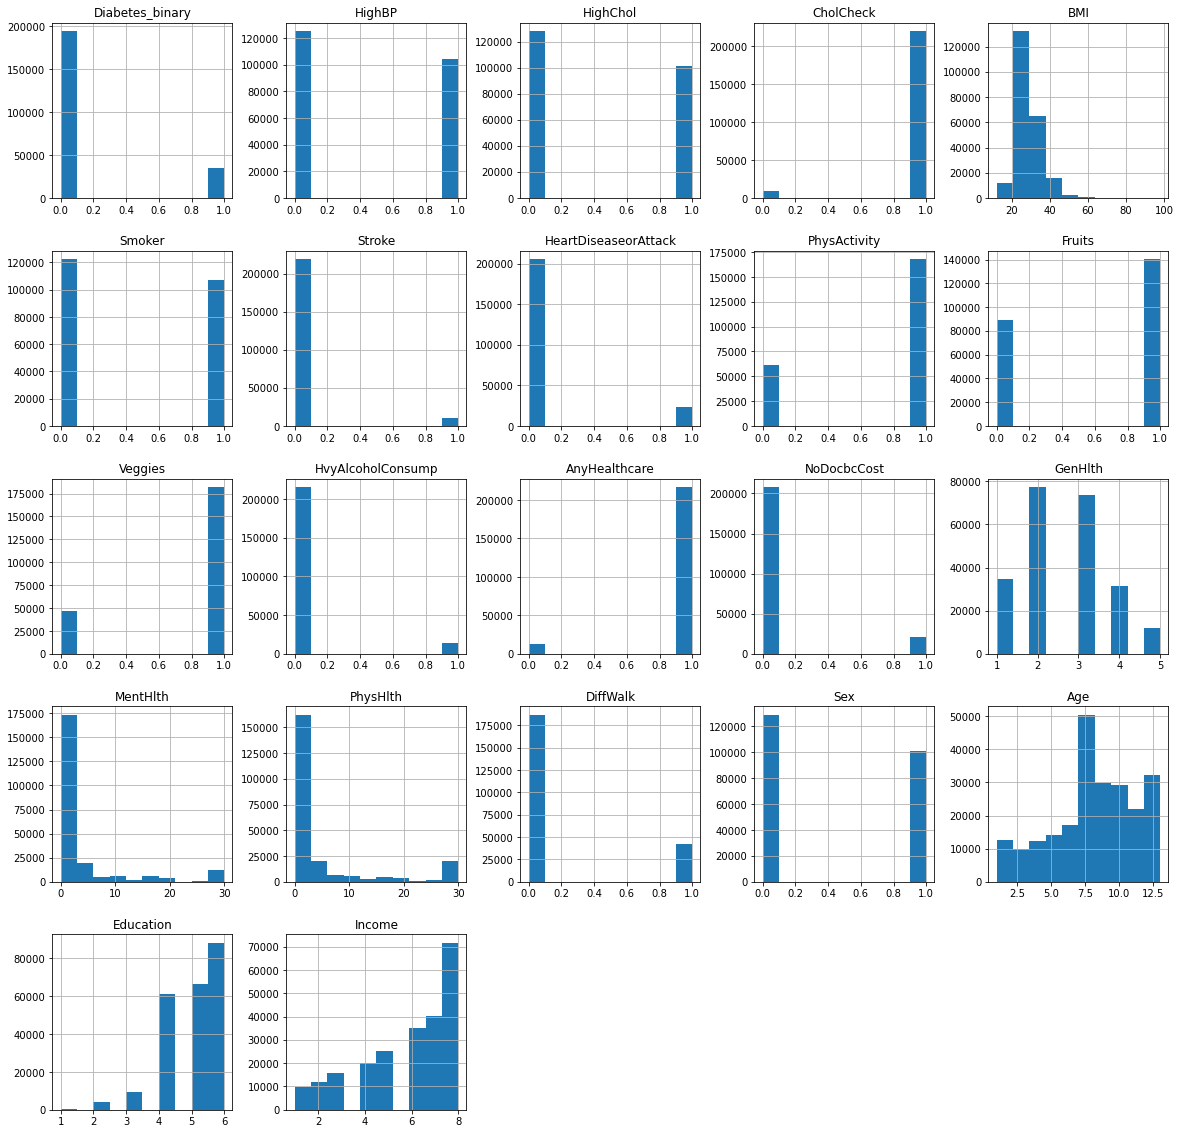

In [14]:
df.hist(figsize=(20,20));

In [ ]:
## Data Preprocessing

In [ ]:
### Outlier Detection

In [24]:
from sklearn.ensemble import IsolationForest
model = IsolationForest()
model.fit(df)

df['anomaly']= model.predict(df)

In [15]:
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,anomaly
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,-1
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,-1
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,-1
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,1
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229469,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0,1
229470,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0,-1
229471,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0,1
229472,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0,1


## Remove rows with outliers

In [25]:
df[df['anomaly'] == -1]

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,anomaly
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,-1
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,-1
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,-1
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0,-1
11,0.0,1.0,1.0,1.0,34.0,1.0,0.0,0.0,0.0,1.0,...,0.0,3.0,0.0,30.0,1.0,0.0,10.0,5.0,1.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253670,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0,-1
253671,0.0,1.0,1.0,1.0,23.0,0.0,1.0,1.0,0.0,0.0,...,1.0,4.0,0.0,5.0,0.0,1.0,8.0,3.0,2.0,-1
253672,0.0,1.0,0.0,1.0,30.0,1.0,0.0,1.0,1.0,1.0,...,0.0,3.0,0.0,0.0,0.0,1.0,12.0,2.0,1.0,-1
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0,-1


In [27]:
df[df['anomaly']==-1].shape

(79927, 23)

In [28]:
df.drop(df[df['anomaly']==-1].index, inplace = True)

In [29]:
df.shape

(173753, 23)

In [30]:
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,anomaly
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,1
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,1
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0,1
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0,1
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253673,0.0,1.0,0.0,1.0,42.0,0.0,0.0,0.0,1.0,1.0,...,0.0,3.0,14.0,4.0,0.0,1.0,3.0,6.0,8.0,1
253674,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,5.0,1
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0,1
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0,1


In [31]:
## Drop 'anomaly' column
df.drop(columns = ['anomaly'], inplace=True)

In [33]:
df.shape

(173753, 22)

## Statistical Test

In [182]:
X = df.iloc[:, 1:]
y = df.iloc[:, 1]

## T-test

In [237]:
t_statistic, p_value = ttest_ind(X, y)

features = X.columns

tstat = pd.Series(t_statistic, index=features)
tstat = tstat.sort_values(ascending=False)

pval = pd.Series(p_value, index=features)
pval = pval.sort_values(ascending=True)

print("Scores")
print(tstat)
print("--"*30)
print("p-values")
print(pval)

Scores
Education               2061.010903
BMI                     2029.264578
Income                  1482.415109
Age                     1014.054611
GenHlth                  784.188115
AnyHealthcare            538.124217
CholCheck                527.799100
Veggies                  372.648694
PhysActivity             358.659644
Fruits                   214.504026
PhysHlth                 107.970183
MentHlth                 107.461227
Sex                       48.922074
Smoker                    17.286832
HighChol                  12.278695
HighBP                     0.000000
DiffWalk                -252.992129
HvyAlcoholConsump       -258.674142
HeartDiseaseorAttack    -264.575271
NoDocbcCost             -276.189946
Stroke                  -302.344563
dtype: float64
------------------------------------------------------------
p-values
HvyAlcoholConsump       0.000000e+00
Age                     0.000000e+00
Sex                     0.000000e+00
DiffWalk                0.000000e+00
Phys

## ANOVA

In [235]:
selector = SelectKBest(score_func=f_classif, k=21)
selector.fit(X, y)

scores = selector.scores_
pvalues = selector.pvalues_

features = X.columns
selected_features_Anova = selector.get_support(indices=True)

result_series_score = pd.Series(scores, index=features)
result_series_pvalue = pd.Series(pvalues, index=features)

result_series_score = result_series_score.sort_values(ascending=False)
result_series_pvalue = result_series_pvalue.sort_values(ascending=True)
print("Scores")
print(result_series_score)
print("--"*30)
print("p-values")
print(result_series_pvalue)

Scores
HighBP                           inf
Age                     2.270943e+04
HighChol                1.345436e+04
GenHlth                 1.045914e+04
BMI                     6.248502e+03
HeartDiseaseorAttack    2.727410e+03
Income                  2.089729e+03
DiffWalk                1.823237e+03
Education               1.776733e+03
CholCheck               1.105860e+03
Smoker                  1.085140e+03
Sex                     6.240835e+02
PhysActivity            4.884063e+02
AnyHealthcare           4.413006e+02
MentHlth                3.287272e+02
NoDocbcCost             2.972334e+02
PhysHlth                2.360288e+02
HvyAlcoholConsump       5.360741e+01
Veggies                 4.465511e+01
Fruits                  4.121341e+01
Stroke                  2.939574e+01
dtype: float64
------------------------------------------------------------
p-values
HighBP                   0.000000e+00
Age                      0.000000e+00
DiffWalk                 0.000000e+00
GenHlth          

Display Top 10 Features according ANOVA test

## Chi-square

In [232]:
selector = SelectKBest(score_func=chi2, k=15)
selector.fit(X, y)

scores = selector.scores_
pvalues = selector.pvalues_

features = X.columns
selected_features_Chi = selector.get_support(indices=True)

result_series_score = pd.Series(scores, index=features)
result_series_pvalue = pd.Series(pvalues, index=features)

result_series_score = result_series_score.sort_values(ascending=False)
result_series_pvalue = result_series_pvalue.sort_values(ascending=True)

print("Scores")
print(result_series_score)
print("--"*30)
print("p-values")
print(result_series_pvalue)

Scores
HighBP                  112660.000000
Age                      23625.018785
HighChol                  7846.929381
BMI                       6756.848527
MentHlth                  4179.592667
GenHlth                   3175.940465
PhysHlth                  2898.910236
HeartDiseaseorAttack      2605.095320
DiffWalk                  1734.073632
Income                     898.039470
Smoker                     668.787145
Sex                        352.990419
NoDocbcCost                290.446313
Education                  252.523330
PhysActivity                68.355809
HvyAlcoholConsump           51.746125
Stroke                      29.302640
CholCheck                   21.167678
Fruits                      12.641084
AnyHealthcare                6.085252
Veggies                      5.697908
dtype: float64
------------------------------------------------------------
p-values
HighBP                   0.000000e+00
HighChol                 0.000000e+00
Age                      0.000000e

## Feature Scaling

In [36]:
X = df.drop(['Diabetes_binary'], axis=1)
y = df['Diabetes_binary']

In [38]:
scaler = StandardScaler()
scaler.fit(X)

scaled_features = scaler.transform(X)

X = pd.DataFrame(scaled_features, columns=df.columns[1:])
X.head(10)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.357967,-0.769020,0.140148,-0.080253,-0.782622,-0.054946,-0.175452,0.404057,0.665258,0.382494,...,0.118398,-0.147077,-0.190780,-0.340439,-0.343821,-0.201276,-0.872744,1.047949,-2.592603,-0.365719
1,1.357967,1.300356,0.140148,-0.621302,-0.782622,-0.054946,-0.175452,0.404057,0.665258,0.382494,...,0.118398,-0.147077,-0.190780,0.351341,-0.343821,-0.201276,-0.872744,1.047949,-0.289279,-1.544372
2,1.357967,1.300356,0.140148,-0.440952,1.277756,-0.054946,-0.175452,0.404057,0.665258,0.382494,...,0.118398,-0.147077,-0.190780,-0.340439,0.129159,-0.201276,1.145811,0.718260,0.862383,0.812934
3,1.357967,-0.769020,0.140148,0.460795,1.277756,-0.054946,-0.175452,-2.474897,-1.503176,-2.614418,...,0.118398,-0.147077,1.008691,-0.340439,2.967039,-0.201276,-0.872744,0.388572,0.862383,0.223608
4,1.357967,1.300356,0.140148,-0.440952,1.277756,-0.054946,-0.175452,0.404057,-1.503176,0.382494,...,0.118398,-0.147077,1.008691,-0.340439,-0.343821,4.968311,-0.872744,1.047949,-1.440941,-1.544372
5,-0.736395,-0.769020,0.140148,-0.621302,-0.782622,-0.054946,-0.175452,-2.474897,-1.503176,0.382494,...,0.118398,-0.147077,-0.190780,-0.340439,-0.343821,-0.201276,1.145811,0.058884,-1.440941,-2.133698
6,-0.736395,-0.769020,0.140148,-0.440952,1.277756,-0.054946,-0.175452,0.404057,0.665258,0.382494,...,0.118398,-0.147077,1.008691,-0.340439,-0.343821,-0.201276,1.145811,1.707325,0.862383,0.812934
7,-0.736395,-0.769020,0.140148,-0.260603,1.277756,-0.054946,-0.175452,-2.474897,-1.503176,0.382494,...,0.118398,-0.147077,1.008691,-0.340439,3.203529,-0.201276,-0.872744,-0.270805,-0.289279,0.223608
8,1.357967,-0.769020,0.140148,1.001843,-0.782622,-0.054946,-0.175452,0.404057,-1.503176,-2.614418,...,0.118398,-0.147077,-0.190780,0.812528,-0.343821,-0.201276,-0.872744,-0.600493,0.862383,0.812934
9,1.357967,1.300356,0.140148,-1.162350,-0.782622,-0.054946,-0.175452,0.404057,0.665258,0.382494,...,0.118398,-0.147077,1.008691,-0.340439,-0.343821,-0.201276,-0.872744,0.718260,-1.440941,-2.133698


## Model Preparation

Here using all features for the modeling, the statistical test from before for feature selection is ignored in this case

In [39]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
clf_KNN = KNeighborsClassifier()

clf_KNN.fit(X_train, y_train)

y_pred_KNN = clf_KNN.predict(X_test)

In [68]:
y_pred_KNN

array([0., 0., 0., ..., 0., 0., 0.])

In [256]:
df['Diabetes_binary'].value_counts()

0.0    163782
1.0      9971
Name: Diabetes_binary, dtype: int64

as seen in the output we have high majority in '0' and minority in '1' this caused the dataset too imbalanced which can make the model prediction not accurate

In [73]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     32800
         1.0       0.28      0.08      0.13      1951

    accuracy                           0.94     34751
   macro avg       0.61      0.53      0.55     34751
weighted avg       0.91      0.94      0.92     34751



In [74]:
print(confusion_matrix(y_test, y_pred_KNN))

[[32387   413]
 [ 1792   159]]


In [76]:
KNN_roc_auc = roc_auc_score(y_test, y_pred_KNN)
KNN_acc = accuracy_score(y_test, y_pred_KNN)
print(KNN_acc)
print(KNN_roc_auc)

0.9365485885298265
0.534452602480279


Using random forest classifier with class_weight = balanced to set the values of minority higher and majority lower to deal with imbalanced data

In [94]:
clf_RF = RandomForestClassifier(class_weight='balanced')

clf_RF.fit(X_train, y_train)

y_pred_RF = clf_RF.predict(X_test)

RF_roc_auc = roc_auc_score(y_test, y_pred_RF)
RF_acc = accuracy_score(y_test, y_pred_RF)

print(classification_report(y_test, y_pred_RF))
print(confusion_matrix(y_test, y_pred_RF))
print('Accuracy Score: ', RF_acc)
print('ROC AUC Score: ', RF_roc_auc)

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96     32800
         1.0       0.19      0.08      0.11      1951

    accuracy                           0.93     34751
   macro avg       0.57      0.53      0.54     34751
weighted avg       0.90      0.93      0.92     34751

[[32180   620]
 [ 1804   147]]
Accuracy Score:  0.930246611608299
ROC AUC Score:  0.5282217686989785


Both model accuracy is good but has terrible ROC AUC which means the predictied value is 50/50 or just a random guess because its binary values the high accuracy of 93 is probably due to majority binary which in this case '0' is predicted right mostly but the model suffer in predicting the minority thus if this model used for predicting other test sample it may not be accurate as this one

Due to imbalanced data the predition about diabates may just be random guesses because rocauc score is too low so we will fix it with SMOTE + ENN SMOTE 
Synthetic Minority Oversampling Technique SMOTE + ENN is technique where more no. of observations are removed from the sample space. ENN is undersampling technique where the nearest neighbors of each of the majority class is estimated. If the nearest neighbors misclassify that particular instance of the majority class, then that instance gets deleted. Integrating this technique with oversampled data done by SMOTE helps in doing extensive data cleaning. This results in a more clear and concise class separation

## Resampling

In [58]:
sm = SMOTEENN()

X_resampled, y_resampled = sm.fit_resample(X ,y)

In [238]:
X_resampled.shape

(279209, 21)

## KNN

In [81]:
clf_KNN = KNeighborsClassifier()

clf_KNN.fit(X_resampled, y_resampled)

y_pred_KNN = clf_KNN.predict(X_test)

KNN_roc_auc = roc_auc_score(y_test, y_pred_KNN)
KNN_acc = accuracy_score(y_test, y_pred_KNN)

print(KNN_acc)
print(KNN_roc_auc)

0.816897355471785
0.8921564769786601


In [96]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

         0.0       1.00      0.81      0.89     32800
         1.0       0.23      0.98      0.37      1951

    accuracy                           0.82     34751
   macro avg       0.62      0.89      0.63     34751
weighted avg       0.96      0.82      0.86     34751



In [ ]:
# mse = mean_squared_error(y_test, y_pred_KNN)
# rmse = math.sqrt(mean_squared_error(y_test, y_pred_KNN))
# mae = mean_absolute_error(y_test, y_pred_KNN)
# mape = mean_absolute_percentage_error(y_test, y_pred_KNN)

# print('Mean Squared Error : '+ str(mse))
# print('Root Mean Squared Error : '+ str(rmse))
# print('Mean Absolute Error : '+ str(mae))
# print('Root Mean Absolute Error : '+ str(mape))

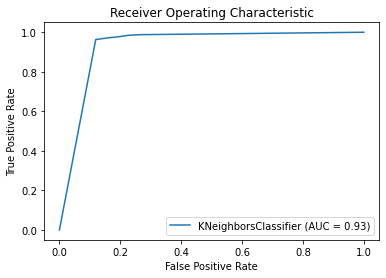

In [260]:
plot_roc_curve(clf_KNN, X_test, y_test)
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Support Vector Machine

In [83]:
clf_SVC = SVC()

clf_SVC.fit(X_resampled, y_resampled)

y_pred_SVC = clf_SVC.predict(X_test)

SVC_roc_auc = roc_auc_score(y_test, y_pred_SVC)
SVC_acc = accuracy_score(y_test, y_pred_SVC)

print(SVC_acc)
print(SVC_roc_auc)

0.7383384650801416
0.8117339997624733


In [97]:
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

         0.0       0.99      0.73      0.84     32800
         1.0       0.16      0.89      0.28      1951

    accuracy                           0.74     34751
   macro avg       0.58      0.81      0.56     34751
weighted avg       0.95      0.74      0.81     34751



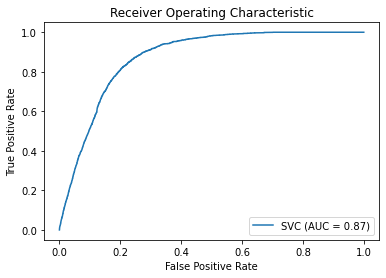

In [255]:
plot_roc_curve(clf_SVC, X_test, y_test)
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Multi-layer Perceptron (Classifier)

In [85]:
clf_MLP = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)

clf_MLP.fit(X_resampled, y_resampled)

y_pred_MLP = clf_MLP.predict(X_test)

MLP_roc_auc = roc_auc_score(y_test, y_pred_MLP)
MLP_acc = accuracy_score(y_test, y_pred_MLP)

print(MLP_acc)
print(MLP_roc_auc)

0.766222554746626
0.8139715249215538


In [98]:
print(classification_report(y_test, y_pred_MLP))

              precision    recall  f1-score   support

         0.0       0.99      0.76      0.86     32800
         1.0       0.18      0.87      0.29      1951

    accuracy                           0.77     34751
   macro avg       0.58      0.81      0.58     34751
weighted avg       0.94      0.77      0.83     34751



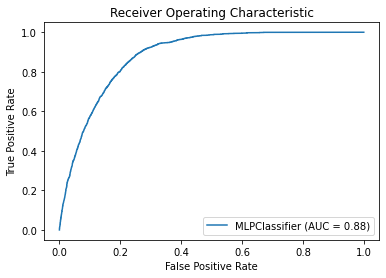

In [254]:
plot_roc_curve(clf_MLP, X_test, y_test)
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Decision Tree

In [87]:
clf_DT = DecisionTreeClassifier()

clf_DT.fit(X_resampled, y_resampled)

y_pred_DT = clf_DT.predict(X_test)

DT_roc_auc = roc_auc_score(y_test, y_pred_DT)
DT_acc = accuracy_score(y_test, y_pred_DT)

print(DT_acc)
print(DT_roc_auc)

0.9329227935886737
0.9239725953544774


In [99]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96     32800
         1.0       0.45      0.91      0.60      1951

    accuracy                           0.93     34751
   macro avg       0.72      0.92      0.78     34751
weighted avg       0.96      0.93      0.94     34751



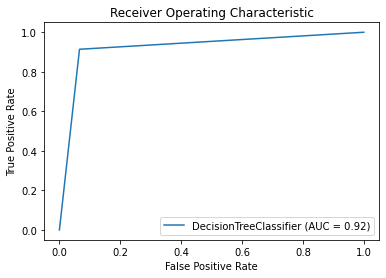

In [253]:
plot_roc_curve(clf_DT, X_test, y_test)
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Random Forest

In [102]:
clf_RF = RandomForestClassifier()

clf_RF.fit(X_resampled, y_resampled)

y_pred_RF = clf_RF.predict(X_test)

RF_roc_auc = roc_auc_score(y_test, y_pred_RF)
RF_acc = accuracy_score(y_test, y_pred_RF)

print(RF_acc)
print(RF_roc_auc)

0.9333544358435728
0.9326374764035954


In [103]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96     32800
         1.0       0.45      0.93      0.61      1951

    accuracy                           0.93     34751
   macro avg       0.73      0.93      0.79     34751
weighted avg       0.97      0.93      0.94     34751



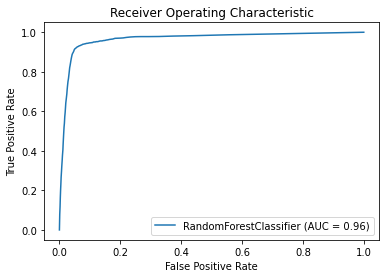

In [252]:
plot_roc_curve(clf_RF, X_test, y_test)
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Logistic Regression

In [90]:
reg_LR = LogisticRegression()

reg_LR.fit(X_resampled, y_resampled)

y_pred_LR = reg_LR.predict(X_test)

LR_roc_auc = roc_auc_score(y_test, y_pred_LR)
LR_acc = accuracy_score(y_test, y_pred_LR)

print(LR_acc)
print(LR_roc_auc)

0.6970159132111307
0.7606785294595642


In [104]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

         0.0       0.99      0.69      0.81     32800
         1.0       0.14      0.83      0.24      1951

    accuracy                           0.70     34751
   macro avg       0.56      0.76      0.52     34751
weighted avg       0.94      0.70      0.78     34751



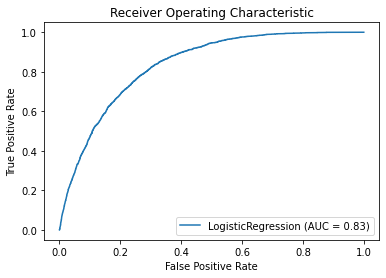

In [248]:
plot_roc_curve(reg_LR, X_test, y_test)
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Extra Trees

In [124]:
clf_ET = ExtraTreesClassifier()

clf_ET.fit(X_resampled, y_resampled)

y_pred_ET = clf_ET.predict(X_test)

ET_roc_auc = roc_auc_score(y_test, y_pred_ET)
ET_acc = accuracy_score(y_test, y_pred_ET)

print(ET_acc)
print(ET_roc_auc)

0.9098155448764065
0.9322197106549487


In [126]:
print(classification_report(y_test, y_pred_ET))

              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95     32800
         1.0       0.38      0.96      0.54      1951

    accuracy                           0.91     34751
   macro avg       0.69      0.93      0.75     34751
weighted avg       0.96      0.91      0.93     34751



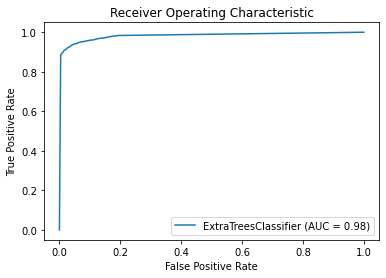

In [249]:
plot_roc_curve(clf_ET, X_test, y_test)
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## XGBoost

In [121]:
clf_XGB = xgb.XGBClassifier()

clf_XGB.fit(X_resampled, y_resampled)

y_pred_XGB = clf_XGB.predict(X_test)

XGB_roc_auc = roc_auc_score(y_test, y_pred_XGB)
XGB_acc = accuracy_score(y_test, y_pred_XGB)

print(XGB_acc)
print(XGB_roc_auc)

0.9139880866737647
0.6786920169144028


In [250]:
print(classification_report(y_test, y_pred_XGB))

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95     32800
         1.0       0.30      0.41      0.35      1951

    accuracy                           0.91     34751
   macro avg       0.63      0.68      0.65     34751
weighted avg       0.93      0.91      0.92     34751



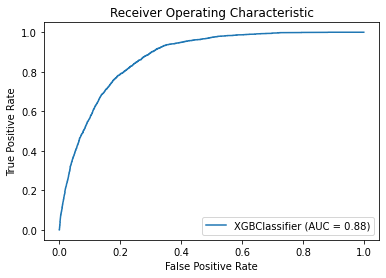

In [251]:
plot_roc_curve(clf_XGB, X_test, y_test)
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Comparing model

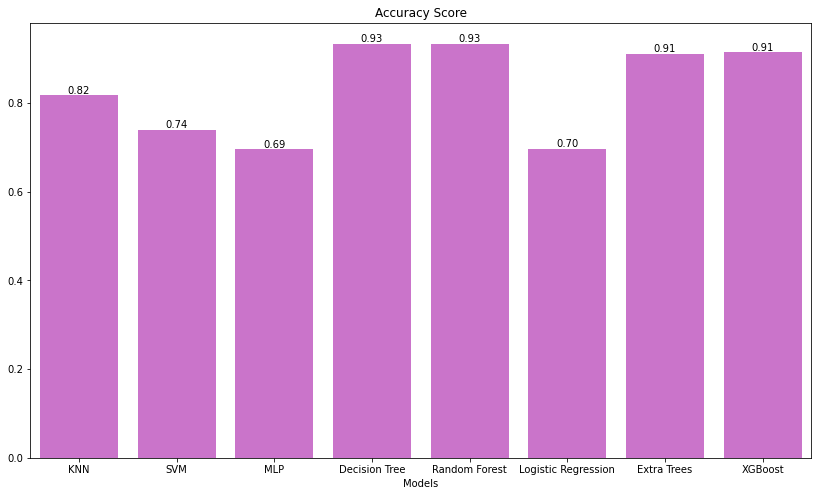

In [149]:
Accuracy_Score = [KNN_acc, SVC_acc, MLP_acc, DT_acc, RF_acc, LR_acc, ET_acc, XGB_acc]
Models = ['KNN', 'SVM' , 'MLP', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Extra Trees', 'XGBoost']



plt.figure(figsize=(14, 8))
ax = sns.barplot(Models, Accuracy_Score, color="m", alpha = 0.6)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.xlabel('Models')
plt.title('Accuracy Score')
plt.show()

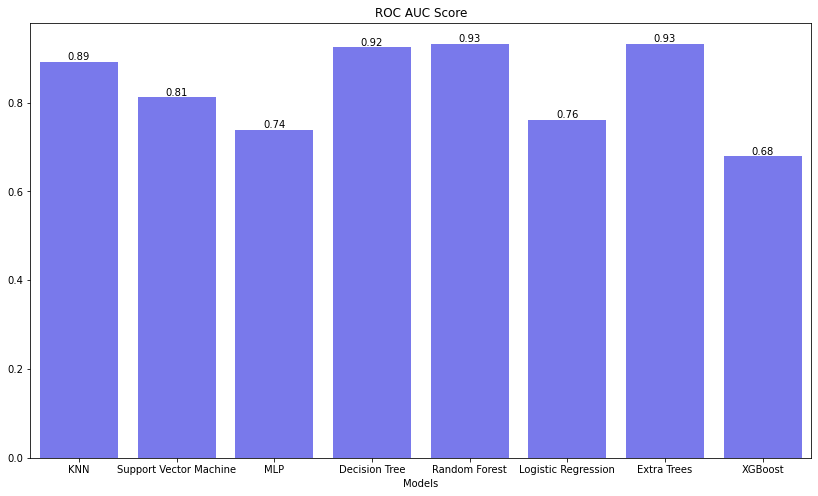

In [147]:
ROCAUC_Score = [KNN_roc_auc, SVC_roc_auc, MLP_roc_auc, DT_roc_auc, RF_roc_auc, LR_roc_auc, ET_roc_auc, XGB_roc_auc]
Models = ['KNN', 'Support Vector Machine' , 'MLP', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Extra Trees', 'XGBoost']




plt.figure(figsize=(14, 8))
ax = sns.barplot(Models, ROCAUC_Score, color="b", alpha = 0.6)
plt.xlabel('Models')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.xlabel('Models')
plt.title('ROC AUC Score')

plt.show()

In [157]:
scores_df = pd.DataFrame({'Model': ['KNN', 'Support Vector Machine' , 'MLP', 'Decision Tree', 'Random Forest', 
                           'Logistic Regression', 'Extra Trees', 'XGBoost'], 
                          
                          'Accuracy': [KNN_acc, SVC_acc, MLP_acc, DT_acc,
                                       RF_acc, LR_acc, ET_acc, XGB_acc],
                          
                          'ROC AUC': [KNN_roc_auc, SVC_roc_auc, MLP_roc_auc, DT_roc_auc, 
                                      RF_roc_auc, LR_roc_auc, ET_roc_auc, XGB_roc_auc]})


scores_df.sort_values(by='ROC AUC', ascending=False)

,Model,Accuracy,ROC AUC
4,Random Forest,0.933354,0.932637
6,Extra Trees,0.909816,0.932220
3,Decision Tree,0.932923,0.923973
0,KNN,0.816897,0.892156
1,Support Vector Machine,0.738338,0.811734
5,Logistic Regression,0.697016,0.760679
2,MLP,0.694829,0.739032
7,XGBoost,0.913988,0.678692
